In [1]:
#导入库
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_train = pd.read_csv(r"D:/mnist_dataset/titanic/train.csv")
data_test = pd.read_csv(r"D:/mnist_dataset/titanic/test.csv")

In [3]:
data_train
#编号         是否存活   几等仓            姓名                   性别    年龄   堂兄弟/妹个数  父母与小孩个数   船票信息   票价    客舱    登船港口

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#先来一波数据清洗  思考一下我们要什么
#是否存活 性别 几等仓 年龄  票价   客舱？（待定）
#查看是否有数据缺失    

In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
#年龄有缺失 考虑把缺失的数据直接删去

In [9]:
#What is the distribution of numerical feature values across the samples?
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
#What is the distribution of categorical features?
data_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Rosblom, Mr. Viktor Richard",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


In [11]:
#Analyze by pivoting features
data_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [12]:
data_train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [13]:
data_train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)
#应该没什么可信度。。。

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [14]:
data_train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)
#意想不到的结果！

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [15]:
data_train[["Embarked","Survived"]].groupby(['Embarked'],as_index = False).mean().sort_values(by='Survived',ascending=False)
#或许有影响？

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


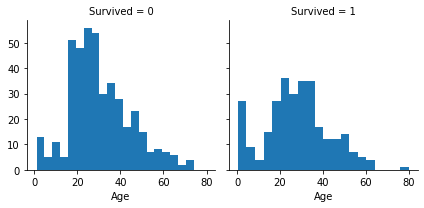

In [16]:
g = sns.FacetGrid(data_train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

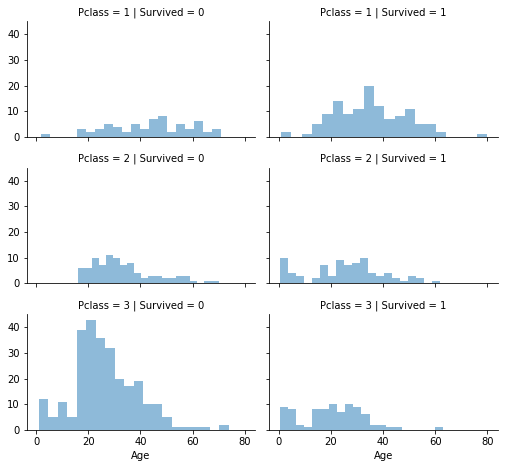

In [17]:
# grid = sns.FacetGrid(data_train, col='Pclass', hue='Survived')
grid = sns.FacetGrid(data_train, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:648: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


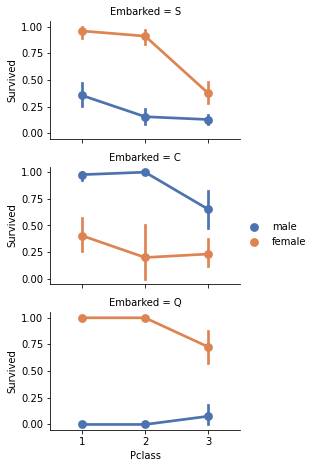

In [18]:
# grid = sns.FacetGrid(data_train, col='Embarked')
grid = sns.FacetGrid(data_train, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


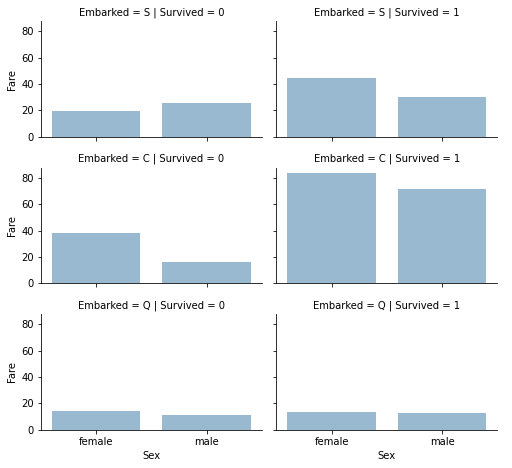

In [19]:
# grid = sns.FacetGrid(data_train, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(data_train, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [20]:
data_train = data_train.fillna(data_train.mean()["Age"])

In [21]:
del data_train['Cabin']

In [22]:
data_train['Sex'] = [1 if x=='male' else 0 for x in data_train.Sex]

In [23]:
data_train['p1'] = np.array(data_train['Pclass'] == 1).astype(np.int32)
data_train['p2'] = np.array(data_train['Pclass'] == 2).astype(np.int32)
data_train['p3'] = np.array(data_train['Pclass'] == 3).astype(np.int32)

In [24]:
data_train.fillna(0,inplace=True)

In [25]:
data_train.Embarked.unique()

array(['S', 'C', 'Q', 29.69911764705882], dtype=object)

In [26]:
data_train['e1'] = np.array(data_train['Embarked'] == 'S').astype(np.int32)
data_train['e2'] = np.array(data_train['Embarked'] == 'C').astype(np.int32)
data_train['e3'] = np.array(data_train['Embarked'] == 'Q').astype(np.int32)

In [27]:
del data_train['Name']

In [28]:
del data_train['PassengerId']
del data_train['Pclass']
del data_train['SibSp']

In [29]:
data_train

,Survived,Sex,Age,Parch,Ticket,Fare,Embarked,p1,p2,p3,e1,e2,e3
0,0,1,22.000000,0,A/5 21171,7.2500,S,0,0,1,1,0,0
1,1,0,38.000000,0,PC 17599,71.2833,C,1,0,0,0,1,0
2,1,0,26.000000,0,STON/O2. 3101282,7.9250,S,0,0,1,1,0,0
3,1,0,35.000000,0,113803,53.1000,S,1,0,0,1,0,0
4,0,1,35.000000,0,373450,8.0500,S,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,27.000000,0,211536,13.0000,S,0,1,0,1,0,0
887,1,0,19.000000,0,112053,30.0000,S,1,0,0,1,0,0
888,0,0,29.699118,2,W./C. 6607,23.4500,S,0,0,1,1,0,0
889,1,1,26.000000,0,111369,30.0000,C,1,0,0,0,1,0


In [30]:
data_target = data_train[['Survived']]
data_train = data_train[['Sex','Age','Parch','Fare','p1','p2','p3','e1','e2','e3']]

In [31]:
data_train.head()

,Sex,Age,Parch,Fare,p1,p2,p3,e1,e2,e3
0,1,22.0,0,7.2500,0,0,1,1,0,0
1,0,38.0,0,71.2833,1,0,0,0,1,0
2,0,26.0,0,7.9250,0,0,1,1,0,0
3,0,35.0,0,53.1000,1,0,0,1,0,0
4,1,35.0,0,8.0500,0,0,1,1,0,0


In [32]:
#处理data_test

In [33]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [34]:
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [35]:
data_test = data_test.fillna(data_test.mean()["Age"])
data_test['Sex'] = [1 if x=='male' else 0 for x in data_test.Sex]

In [36]:
data_test['e1'] = np.array(data_test['Embarked'] == 'S').astype(np.int32)
data_test['e2'] = np.array(data_test['Embarked'] == 'C').astype(np.int32)
data_test['e3'] = np.array(data_test['Embarked'] == 'Q').astype(np.int32)

In [37]:
data_test['p1'] = np.array(data_test['Pclass'] == 1).astype(np.int32)
data_test['p2'] = np.array(data_test['Pclass'] == 2).astype(np.int32)
data_test['p3'] = np.array(data_test['Pclass'] == 3).astype(np.int32)

In [38]:
del data_test['Cabin']
del data_test['PassengerId']
del data_test['Pclass']
del data_test['SibSp']
del data_test['Name']
del data_test['Embarked']
del data_test['Ticket']

In [39]:
data_test['Age']

0      34.50000
1      47.00000
2      62.00000
3      27.00000
4      22.00000
         ...   
413    30.27259
414    39.00000
415    38.50000
416    30.27259
417    30.27259
Name: Age, Length: 418, dtype: float64

In [40]:
data_test

,Sex,Age,Parch,Fare,e1,e2,e3,p1,p2,p3
0,1,34.50000,0,7.8292,0,0,1,0,0,1
1,0,47.00000,0,7.0000,1,0,0,0,0,1
2,1,62.00000,0,9.6875,0,0,1,0,1,0
3,1,27.00000,0,8.6625,1,0,0,0,0,1
4,0,22.00000,1,12.2875,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,1,30.27259,0,8.0500,1,0,0,0,0,1
414,0,39.00000,0,108.9000,0,1,0,1,0,0
415,1,38.50000,0,7.2500,1,0,0,0,0,1
416,1,30.27259,0,8.0500,1,0,0,0,0,1


In [41]:
data_target = data_target.values.reshape(len(data_target),1)

In [42]:
data_target.shape,data_train.shape

((891, 1), (891, 10))

In [43]:
#随机森林来一发
from sklearn.ensemble import RandomForestClassifier

In [44]:
data_target = data_target.ravel()

In [45]:
data_target.shape

(891,)

In [46]:
fcl = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
fcl.fit(data_train,data_target)

RandomForestClassifier(min_samples_split=10, n_estimators=700, n_jobs=-1,
                       oob_score=True, random_state=1)

In [47]:
fcl.score(data_train,data_target)

0.9102132435465768

In [48]:
 predict = fcl.predict(data_test)

In [49]:
# pre = pd.Series(predict)

In [50]:
# pre

In [51]:
result = pd.read_csv(r"D:/mnist_dataset/titanic/gender_submission.csv")
result['Survived'] = predict

In [52]:
result.to_csv(path_or_buf=r"D:/mnist_dataset/titanic/gender_submission.csv")